In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/datachallengereal"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/content/drive/MyDrive/datachallengereal


Step 1 Loading the data and checking if its all good before cleaning

In [3]:
import pandas as pd
df = pd.read_csv("team03_restaurant.csv")
df.head()

,review_id,restaurant_id,rating,price_range,cuisine,day_of_week,meal_time,delivery,wait_time
0,1,18,5.0,$$$$,Indian,Wednesday,Lunch,False,15.0
1,2,38,4.0,$$,Indian,Tuesday,Dinner,False,42.0
2,3,46,3.0,$$,Italian,Tuesday,Dinner,False,16.0
3,4,18,5.0,$$,Chinese,Wednesday,Breakfast,False,21.0
4,5,49,3.0,$$$,Indian,Friday,Dinner,False,19.0


In [4]:
df.shape

(1200, 9)

In [5]:
df.columns

Index(['review_id', 'restaurant_id', 'rating', 'price_range', 'cuisine',
       'day_of_week', 'meal_time', 'delivery', 'wait_time'],
      dtype='object')

In [6]:
df.dtypes

,0
review_id,int64
restaurant_id,int64
rating,float64
price_range,object
cuisine,object
day_of_week,object
meal_time,object
delivery,bool
wait_time,float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_id      1200 non-null   int64  
 1   restaurant_id  1200 non-null   int64  
 2   rating         1141 non-null   float64
 3   price_range    1200 non-null   object 
 4   cuisine        1200 non-null   object 
 5   day_of_week    1200 non-null   object 
 6   meal_time      1200 non-null   object 
 7   delivery       1200 non-null   bool   
 8   wait_time      1155 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 76.3+ KB


In [8]:
df.describe()

,review_id,restaurant_id,rating,wait_time
count,1200.000000,1200.000000,1141.000000,1155.000000
mean,600.500000,24.418333,3.850131,24.928139
std,346.554469,14.025415,1.120531,9.619856
min,1.000000,1.000000,1.000000,5.000000
25%,300.750000,12.000000,3.000000,18.000000
50%,600.500000,24.000000,4.000000,25.000000
75%,900.250000,36.000000,5.000000,32.000000
max,1200.000000,49.000000,5.000000,56.000000


We loaded the Team 3 restaurant CSV into a pandas DataFrame and confirmed it imported correctly. We checked the dataset size, column names, and data types using shape, columns, and info

In [9]:
df.isna().sum()

,0
review_id,0
restaurant_id,0
rating,59
price_range,0
cuisine,0
day_of_week,0
meal_time,0
delivery,0
wait_time,45


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df["review_id"].duplicated().sum()

np.int64(0)

In [12]:
df["rating"].min(), df["rating"].max()

(1.0, 5.0)

In [13]:
for col in ["price_range", "cuisine", "day_of_week", "meal_time"]:
    print("\n", col)
    print(df[col].value_counts(dropna=False))


 price_range
price_range
$$      419
$       322
$$$     291
$$$$    168
Name: count, dtype: int64

 cuisine
cuisine
American    222
Indian      218
Mexican     211
Italian     205
Japanese    178
Chinese     166
Name: count, dtype: int64

 day_of_week
day_of_week
Sunday       189
Thursday     182
Friday       177
Saturday     174
Wednesday    165
Tuesday      163
Monday       150
Name: count, dtype: int64

 meal_time
meal_time
Dinner       592
Lunch        436
Breakfast    172
Name: count, dtype: int64


Data quality checks
“We scanned for missing values and duplicates. We used isna().sum() to see which columns have blanks, and duplicated() plus a duplicate check on review_id to make sure rows and IDs are not repeated.”

We did quick sanity checks to make sure values look reasonable. We checked the rating range to confirm it stays within expected limits, and We reviewed value counts for the main category columns like cuisine, day of week, meal time, and price range to spot any inconsistent labels.”

**Handle missing values**

In [14]:
df_clean = df.copy()

We made a copy of the original dataset so the raw data stays unchanged. All cleaning is done on df_clean

In [15]:
missing_before = df_clean.isna().sum()
missing_before

,0
review_id,0
restaurant_id,0
rating,59
price_range,0
cuisine,0
day_of_week,0
meal_time,0
delivery,0
wait_time,45


In [16]:
numeric_cols = df_clean.select_dtypes(include=["number"]).columns

for col in numeric_cols:
    if df_clean[col].isna().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [17]:
missing_after = df_clean.isna().sum()
missing_after

,0
review_id,0
restaurant_id,0
rating,0
price_range,0
cuisine,0
day_of_week,0
meal_time,0
delivery,0
wait_time,0


We checked which columns had missing values, then filled missing values in numeric columns using the median. We chose median imputation to keep all rows and avoid skew from outliers. After filling, We rechecked missing values to confirm the blanks were handled.

**Fix data type issues**


In [18]:
df_clean.dtypes

,0
review_id,int64
restaurant_id,int64
rating,float64
price_range,object
cuisine,object
day_of_week,object
meal_time,object
delivery,bool
wait_time,float64


In [19]:
for col in df_clean.columns:
    if df_clean[col].dtype == "object":
        converted = pd.to_numeric(df_clean[col], errors="ignore")
        df_clean[col] = converted

/tmp/ipython-input-1650/2567783417.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  converted = pd.to_numeric(df_clean[col], errors="ignore")


In [20]:
df_clean.dtypes

,0
review_id,int64
restaurant_id,int64
rating,float64
price_range,object
cuisine,object
day_of_week,object
meal_time,object
delivery,bool
wait_time,float64


We reviewed the data types to make sure columns were stored correctly. If any numeric-looking columns were stored as text, We converted them so calculations and plots work properly. Then We checked the data types again to confirm. Data Types were good nothing needed to be changed


**Address inconsistencies**

In [21]:
cat_cols = df_clean.select_dtypes(include=["object"]).columns
cat_cols

Index(['price_range', 'cuisine', 'day_of_week', 'meal_time'], dtype='object')

In [22]:
for col in cat_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip()

In [23]:
for col in cat_cols:
    df_clean[col] = df_clean[col].astype(str).str.title()

In [24]:
for col in ["price_range", "cuisine", "day_of_week", "meal_time"]:
    if col in df_clean.columns:
        print("\n", col)
        print(df_clean[col].value_counts(dropna=False))


 price_range
price_range
$$      419
$       322
$$$     291
$$$$    168
Name: count, dtype: int64

 cuisine
cuisine
American    222
Indian      218
Mexican     211
Italian     205
Japanese    178
Chinese     166
Name: count, dtype: int64

 day_of_week
day_of_week
Sunday       189
Thursday     182
Friday       177
Saturday     174
Wednesday    165
Tuesday      163
Monday       150
Name: count, dtype: int64

 meal_time
meal_time
Dinner       592
Lunch        436
Breakfast    172
Name: count, dtype: int64


We checked categorical columns for inconsistent formatting. We standardized text by trimming extra spaces and making labels consistent, then We reviewed value counts for key categorical columns to confirm categories are clean and consistent.

**Final Checks**

In [25]:
print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)

Original shape: (1200, 9)
Cleaned shape: (1200, 9)


In [26]:
df_clean.isna().sum()

,0
review_id,0
restaurant_id,0
rating,0
price_range,0
cuisine,0
day_of_week,0
meal_time,0
delivery,0
wait_time,0


In [27]:
for col in ["rating", "wait_time"]:
    if col in df_clean.columns:
        print(col, "min/max:", df_clean[col].min(), df_clean[col].max())

rating min/max: 1.0 5.0
wait_time min/max: 5.0 56.0


After cleaning, We validated the dataset by confirming the shape stayed the same, missing values were handled, and key numeric columns still fall in realistic ranges. We also previewed the cleaned data to confirm it looks correct

**STEP 4 **

Question 1, What is the average rating by price range?


In [28]:
avg_by_price = (
    df_clean.groupby("price_range")["rating"]
    .mean()
    .sort_values(ascending=False)
)

avg_by_price

,rating
price_range,
$$$,3.900344
$$$$,3.880952
$$,3.854415
$,3.810559


In [29]:
avg_by_price_df = avg_by_price.reset_index()
avg_by_price_df.columns = ["price_range", "avg_rating"]
avg_by_price_df

,price_range,avg_rating
0,$$$,3.900344
1,$$$$,3.880952
2,$$,3.854415
3,$,3.810559


Average ratings are fairly similar across price ranges, but $$$ has the highest average rating (about 3.90) and $ has the lowest (about 3.81). Overall, price range does not seem to strongly change ratings in this dataset.”

We grouped the reviews by price_range and calculated the mean of rating for each group. This shows how average customer ratings change across different price levels

Question 2 Which Cuisine type receives the highest ratings?

In [30]:

avg_by_cuisine = (
    df_clean.groupby("cuisine")["rating"]
    .mean()
    .sort_values(ascending=False)
)

avg_by_cuisine.head(10)

,rating
cuisine,
American,3.941441
Italian,3.878049
Mexican,3.857820
Japanese,3.848315
Chinese,3.843373
Indian,3.770642


In [31]:
cuisine_summary = (
    df_clean.groupby("cuisine")["rating"]
    .agg(avg_rating="mean", review_count="count")
    .sort_values(by="avg_rating", ascending=False)
)

cuisine_summary.head(10)

,avg_rating,review_count
cuisine,,
American,3.941441,222
Italian,3.878049,205
Mexican,3.857820,211
Japanese,3.848315,178
Chinese,3.843373,166
Indian,3.770642,218


We grouped the dataset by cuisine and calculated the average rating for each cuisine type. We also included the number of reviews per cuisine so the result is not biased by cuisines with only a few reviews.

American cuisine has the highest average rating (about 3.94) and it also has a solid number of reviews (222), so it is not a small sample result. Italian (3.88) and Mexican (3.86) follow closely, while Indian is the lowest average rating in this dataset (about 3.77).”

Question 3 How does wait time correlate with ratings?

In [32]:
# make sure both columns are numeric
df_clean["wait_time"] = pd.to_numeric(df_clean["wait_time"], errors="coerce")
df_clean["rating"] = pd.to_numeric(df_clean["rating"], errors="coerce")

# keep only rows where both values exist
corr_df = df_clean[["wait_time", "rating"]].dropna()

# Pearson correlation (default for pandas)
corr_value = corr_df["wait_time"].corr(corr_df["rating"])
corr_value

np.float64(-0.003462449148600111)

In [33]:
threshold = 0.05

if corr_value > threshold:
    print("Positive correlation (meaningful): ratings tend to increase as wait time increases.")
elif corr_value < -threshold:
    print("Negative correlation (meaningful): ratings tend to decrease as wait time increases.")
else:
    print("No meaningful correlation: wait time and rating are basically unrelated.")

No meaningful correlation: wait time and rating are basically unrelated.


we compared wait_time and rating by calculating the Pearson correlation coefficient. Correlation values close to 0 mean little to no relationship, while negative values mean ratings drop as wait time increases

Wait time and rating have almost no relationship in this dataset. The Pearson correlation is about -0.003, which is extremely close to zero, so longer wait times do not meaningfully predict higher or lower ratings here.

Question 4
Do delivery orders have different ratings than dine-in?

average rating by delivery vs dine-in


In [35]:
df_clean["rating"] = pd.to_numeric(df_clean["rating"], errors="coerce")

df_clean["delivery"].value_counts(dropna=False)

,count
delivery,
False,850
True,350


In [36]:
avg_by_delivery = df_clean.groupby("delivery")["rating"].agg(["mean", "count"])
avg_by_delivery

,mean,count
delivery,,
False,3.830588,850
True,3.922857,350


T test statistical analysis

In [37]:
from scipy.stats import ttest_ind

delivery_ratings = df_clean[df_clean["delivery"] == True]["rating"].dropna()
dinein_ratings = df_clean[df_clean["delivery"] == False]["rating"].dropna()

t_stat, p_value = ttest_ind(delivery_ratings, dinein_ratings, equal_var=False)

print("Delivery mean:", delivery_ratings.mean())
print("Dine-in mean:", dinein_ratings.mean())
print("t-stat:", t_stat)
print("p-value:", p_value)

Delivery mean: 3.922857142857143
Dine-in mean: 3.8305882352941176
t-stat: 1.3426689971169725
p-value: 0.17983767262427272


We compared average ratings for delivery vs dine-in orders using a groupby summary. Then We ran an independent two-sample t-test to check if the difference in means is statistically significant

Delivery reviews have a slightly higher average rating (3.92) than dine-in reviews (3.83). However, the t-test p-value is 0.18, so the difference is not statistically significant, meaning we cannot confidently say delivery is rated differently than dine-in in this dataset.

Question 5: Which day of the week has the highest average rating?

In [38]:
df_clean["rating"] = pd.to_numeric(df_clean["rating"], errors="coerce")

day_summary = (
    df_clean.groupby("day_of_week")["rating"]
    .agg(avg_rating="mean", review_count="count")
    .sort_values(by="avg_rating", ascending=False)
)

day_summary

,avg_rating,review_count
day_of_week,,
Monday,3.920000,150
Thursday,3.906593,182
Tuesday,3.883436,163
Wednesday,3.878788,165
Sunday,3.867725,189
Friday,3.785311,177
Saturday,3.770115,174


We grouped reviews by day_of_week and calculated the mean rating for each day. We also included the number of reviews per day to make sure the result is based on a reasonable amount of data.

Monday has the highest average rating (3.92) with 150 reviews, followed closely by Thursday (3.91). The lowest average ratings occur on the weekend, especially Saturday (3.77), suggesting ratings dip slightly on busier days

Question 6
What percentage of reviews are 4 stars or higher by meal time?


In [39]:
df_clean["rating"] = pd.to_numeric(df_clean["rating"], errors="coerce")

# True if rating is 4 or 5
df_clean["is_4_plus"] = df_clean["rating"] >= 4

meal_summary = (
    df_clean.groupby("meal_time")["is_4_plus"]
    .agg(percent_4_plus="mean", review_count="count")
)

# convert proportion to percent
meal_summary["percent_4_plus"] = meal_summary["percent_4_plus"] * 100

# sort highest to lowest
meal_summary = meal_summary.sort_values(by="percent_4_plus", ascending=False)

meal_summary

,percent_4_plus,review_count
meal_time,,
Dinner,72.128378,592
Lunch,72.018349,436
Breakfast,68.604651,172


We created a boolean column that flags whether a review is 4 stars or higher. Then We grouped by meal_time and used the mean of that boolean to get the percentage of 4+ star reviews for each meal time, along with the number of reviews.”

Dinner and lunch have almost the same percentage of 4+ star reviews at about 72%, while breakfast is a bit lower at about 68.6%. Dinner also has the largest number of reviews, so that result is based on the most data.


**Final Wrap up and summary of Step 4**

-Price range and ratings are very similar overall. $$$ had the highest average rating 3.90 and $ had the lowest 3.81, but the differences were small.



-Cuisine with the highest ratings is American. American had the top average rating 3.94 with a strong number of reviews 222, followed by Italian 3.88 and Mexican 3.86.



-Wait time does not meaningfully affect ratings. The correlation between wait time and rating was about -0.003, which is basically zero.




-Delivery is rated slightly higher than dine-in, but not significantly. Delivery averaged 3.92 vs dine-in 3.83, but the p-value 0.18 shows the difference is not statistically significant.




-Monday has the highest average rating. Monday was highest 3.92. Ratings were lowest on the weekend, especially Saturday 3.77.




-Dinner and lunch have the highest percentage of 4+ star reviews. Dinner 72.13% and lunch 72.02% are almost identical, while breakfast is lower 68.60%.

**STEP 5 Visulizations**

Visualization 1: Average Rating by Price Range bar chart


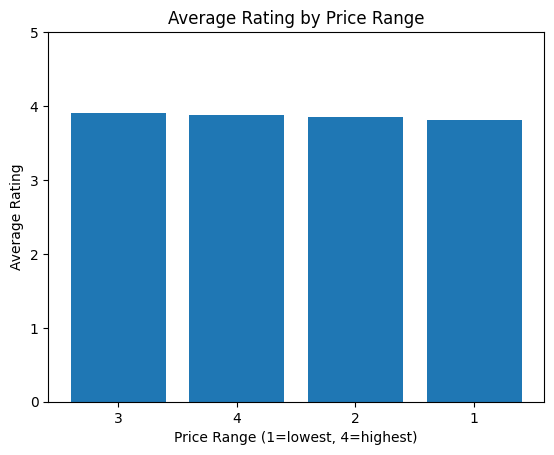

,price_range,rating
0,$$$,3.900344
1,$$$$,3.880952
2,$$,3.854415
3,$,3.810559


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# recompute in case variables are not in memory
df_clean["rating"] = pd.to_numeric(df_clean["rating"], errors="coerce")

price_viz = (
    df_clean.groupby("price_range")["rating"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# avoid the $ math-text issue by using simple labels
label_map = {"$":"1", "$$":"2", "$$$":"3", "$$$$":"4"}
x_labels = price_viz["price_range"].map(label_map)
y = price_viz["rating"]

plt.figure()
plt.bar(x_labels, y)
plt.ylabel("Average Rating")
plt.xlabel("Price Range (1=lowest, 4=highest)")
plt.title("Average Rating by Price Range")
plt.ylim(0, 5)
plt.savefig("viz1_avg_rating_by_price.png", dpi=300, bbox_inches="tight")
plt.show()

price_viz

We created a bar chart showing the mean rating for each price range. The x-axis uses 1 to 4 to represent $ to $$$$ so the labels are clean, and the y-axis shows the average rating. This makes it easy to compare ratings across price levels.

Ratings are very similar across price ranges. The highest average rating is around the mid to higher price range, and the lowest is the cheapest range, but the differences are small overall.

Visualization 2: Average Rating by Cuisine bar chart, top cuisines

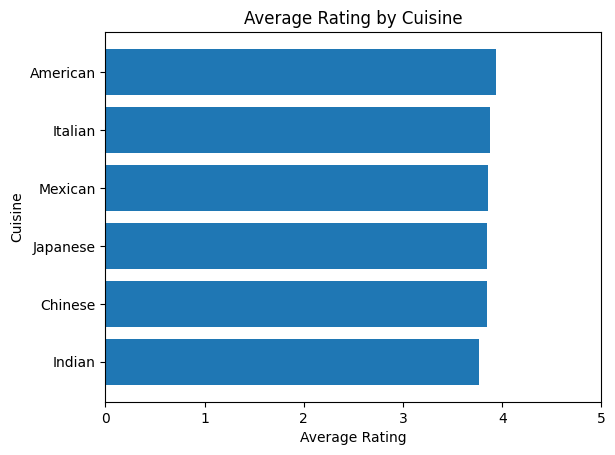

,avg_rating,review_count
cuisine,,
Indian,3.770642,218
Chinese,3.843373,166
Japanese,3.848315,178
Mexican,3.857820,211
Italian,3.878049,205
American,3.941441,222


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df_clean["rating"] = pd.to_numeric(df_clean["rating"], errors="coerce")

# average rating and counts by cuisine
cuisine_viz = (
    df_clean.groupby("cuisine")["rating"]
    .agg(avg_rating="mean", review_count="count")
    .sort_values(by="avg_rating", ascending=False)
)

# pick top 6 cuisines (your dataset has 6, so this should show all)
top_cuisine = cuisine_viz.head(6).sort_values(by="avg_rating", ascending=True)

plt.figure()
plt.barh(top_cuisine.index, top_cuisine["avg_rating"])
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.title("Average Rating by Cuisine")
plt.xlim(0, 5)
plt.savefig("viz2_avg_rating_by_cuisine.png", dpi=300, bbox_inches="tight")
plt.show()

top_cuisine

We grouped the data by cuisine and calculated the mean rating for each cuisine type. We plotted the average ratings in a horizontal bar chart to make it easy to compare cuisines.

American cuisine has the highest average rating, followed by Italian and Mexican. Indian cuisine has the lowest average rating in this dataset.

Visualization 3: Wait Time vs Rating scatter plot

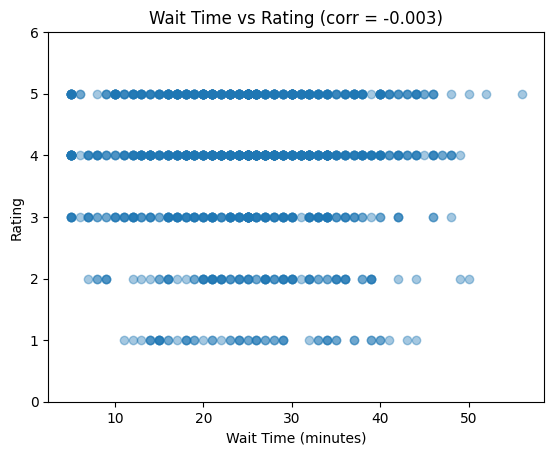

np.float64(-0.003462449148600111)

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df_clean["wait_time"] = pd.to_numeric(df_clean["wait_time"], errors="coerce")
df_clean["rating"] = pd.to_numeric(df_clean["rating"], errors="coerce")

viz3_df = df_clean[["wait_time", "rating"]].dropna()

corr_value = viz3_df["wait_time"].corr(viz3_df["rating"])

plt.figure()
plt.scatter(viz3_df["wait_time"], viz3_df["rating"], alpha=0.4)
plt.xlabel("Wait Time (minutes)")
plt.ylabel("Rating")
plt.title(f"Wait Time vs Rating (corr = {corr_value:.3f})")
plt.ylim(0, 6)
plt.savefig("viz3_wait_time_vs_rating.png", dpi=300, bbox_inches="tight")
plt.show()

corr_value

We created a scatter plot of wait time versus rating to visually check the relationship between these two variables. We also included the correlation value in the title to summarize the relationship numerically.

The points are widely scattered and the correlation is close to zero, showing that wait time does not meaningfully predict rating in this dataset.

Visualization 4: Percent of 4+ Star Reviews by Meal Time bar chart

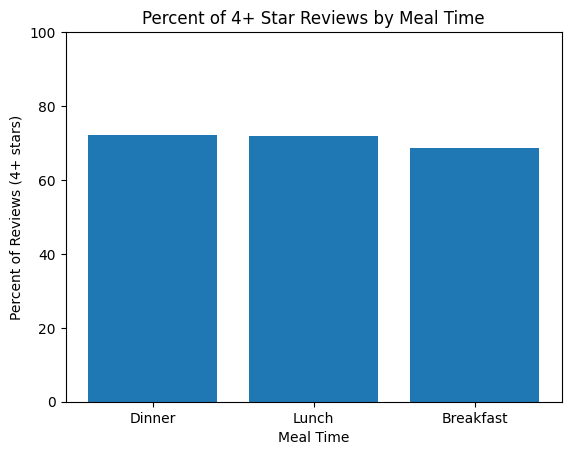

,percent_4_plus,review_count
meal_time,,
Dinner,72.128378,592
Lunch,72.018349,436
Breakfast,68.604651,172


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df_clean["rating"] = pd.to_numeric(df_clean["rating"], errors="coerce")

# flag 4+ star reviews
df_clean["is_4_plus"] = df_clean["rating"] >= 4

meal_viz = (
    df_clean.groupby("meal_time")["is_4_plus"]
    .agg(percent_4_plus="mean", review_count="count")
)

meal_viz["percent_4_plus"] = meal_viz["percent_4_plus"] * 100
meal_viz = meal_viz.sort_values(by="percent_4_plus", ascending=False)

plt.figure()
plt.bar(meal_viz.index.astype(str), meal_viz["percent_4_plus"])
plt.ylabel("Percent of Reviews (4+ stars)")
plt.xlabel("Meal Time")
plt.title("Percent of 4+ Star Reviews by Meal Time")
plt.ylim(0, 100)
plt.savefig("viz4_percent_4plus_by_mealtime.png", dpi=300, bbox_inches="tight")
plt.show()

meal_viz

We created a boolean flag for reviews that are 4 stars or higher, then grouped by meal time and calculated the percentage of 4+ star reviews. This visualization shows how often each meal time receives high ratings.

Dinner and lunch have the highest share of 4+ star reviews at about 72%, while breakfast is slightly lower at about 69%.

## Key Findings (Entire Process)

- **Setup completed:** Created the GitHub repo, uploaded the dataset, and worked in Google Colab with Google Drive mounting so the notebook and CSV load reliably.
- **Data exploration (Step 2):** Confirmed the dataset loaded correctly, checked shape, columns, and data types, and reviewed summary statistics to understand the structure.
- **Data quality checks (Step 2):** Checked for missing values, duplicates, and unrealistic values. This helped identify what needed cleaning before analysis.
- **Data cleaning decisions (Step 3):** Kept all rows, handled missing numeric values using median imputation, ensured numeric columns were properly typed, and standardized categorical text formatting where needed.
- **Validation after cleaning (Step 3):** Rechecked missing values, data types, dataset shape, and basic numeric ranges to confirm the cleaned dataset was still consistent and usable.
- **Analysis completed (Step 4):** Answered all six assigned questions using groupby summaries, correlation, and a t-test where appropriate, then summarized the results into clear insights.
- **Visualizations completed (Step 5):** Created four meaningful plots with titles and labels, saved them as PNG files, and wrote short interpretations to match each plot.
- **Presentation ready (Step 6):** Consolidated results into bullet-point takeaways that can be used directly for the demo and explanation.